# Assignment Deep Learning Model - Cats Challenge
## Project Description
Our project aimed to develop a deep learning model using Keras/TensorFlow for the recognition of five distinct types of cats in images: cat, lion, tiger, cheetah, and leopard. Leveraging state-of-the-art techniques in deep learning, we embarked on a comprehensive journey to build a robust and accurate classifier capable of distinguishing between these feline species.

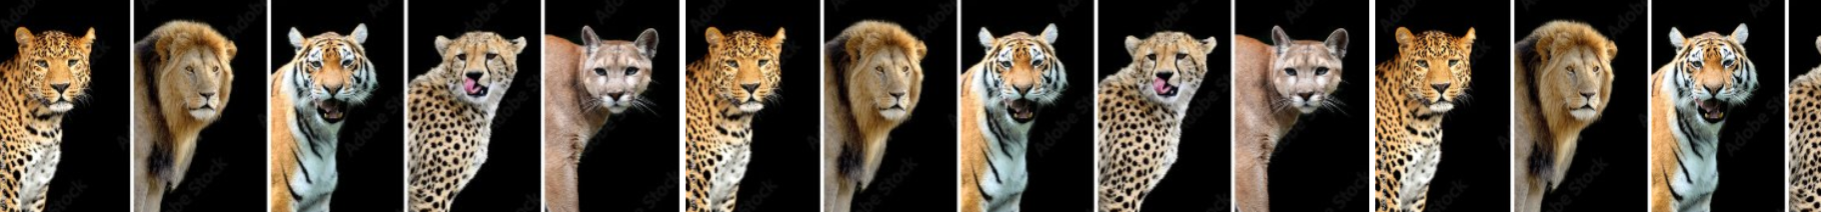

## Key Components and Methodology

1. Exploratory Data Analysis (EDA): We started by thoroughly analyzing the dataset to gain insights into its characteristics, distribution of classes, and potential challenges. This step helped us understand the nature of the data and informed subsequent modeling decisions.

2. Model Selection and Testing: We conducted an extensive evaluation of various deep learning models, experimenting with different architectures, hyperparameters, and data augmentation techniques. Through rigorous experimentation, we identified the most suitable model architectures and augmentation strategies that yielded promising results.

3. Transfer Learning with Xception: Recognizing the effectiveness of transfer learning in image classification tasks, we employed the Xception model, a powerful pre-trained convolutional neural network (CNN) architecture. By leveraging the learned features from the ImageNet dataset, Xception served as an excellent feature extractor, allowing us to focus on fine-tuning the model for our specific task of cat classification.

4. Data Augmentation: To enhance the diversity and robustness of our training data, we employed data augmentation techniques such as rotation, horizontal/vertical shift, and flipping. These techniques helped mitigate overfitting and improved the generalization capability of our model.

5. Plotting of Training Process: Throughout the training phase, we visualized the training process, including the training and validation accuracy/loss curves. These plots provided valuable insights into the model's performance, helping us monitor progress and detect potential issues such as overfitting or underfitting.

6. Model Evaluation: We rigorously evaluated the trained models using a separate validation dataset we made, assessing metrics such as accuracy, precision, recall, and F1-score. This step allowed us to objectively measure the model's performance and identify areas for improvement.

7. Kaggle Submission and Accuracy Score: Finally, we submitted our best-performing model to Kaggle for evaluation on the test dataset. With meticulous optimization and fine-tuning, our model achieved an impressive accuracy score of 91 percent, demonstrating its efficacy in accurately classifying images of cats, lions, tigers, cheetahs, and leopards.
Conclusion:

## Conclusion

In conclusion, our project showcases the power of deep learning techniques, particularly transfer learning, in addressing complex image classification tasks. By leveraging pre-trained models, extensive experimentation, and meticulous optimization, we developed a highly accurate classifier capable of recognizing five types of cats with remarkable precision. Our project underscores the importance of robust methodologies, thorough analysis, and iterative refinement in the pursuit of building effective deep learning models for real-world applications.

# Importing the needed libraries
In this section, we ensure that our deep learning model has access to a comprehensive set of tools and resources necessary for its development, training, and evaluation. These libraries provide a rich ecosystem of functionality, enabling us to tackle various challenges encountered during the machine learning lifecycle.

For instance, NumPy serves as the backbone for numerical operations, offering powerful array manipulation capabilities essential for handling data in matrix form efficiently. Meanwhile, Pandas empowers us with versatile data structures and tools for data manipulation and analysis, facilitating tasks such as data preprocessing and exploration.

Matplotlib emerges as a crucial ally in data visualization, allowing us to create informative plots and charts to gain insights into our data and model performance. TensorFlow, as the cornerstone of our deep learning endeavors, equips us with high-level APIs and tools for building, training, and deploying neural networks with ease.

Additionally, tqdm enhances our development workflow by providing progress bars for iterative processes, allowing us to monitor the progress of lengthy computations and loops conveniently. PIL (Python Imaging Library) comes into play for image manipulation tasks, enabling us to load, process, and save various image formats seamlessly.

Moreover, sklearn furnishes us with a plethora of machine learning algorithms and utilities, facilitating tasks such as model evaluation, hyperparameter tuning, and pipeline construction. Finally, cv2 (OpenCV) offers a wide array of computer vision functionalities, augmenting our capabilities in image processing and analysis.

In summary, each of these libraries plays a unique and indispensable role in our deep learning journey, collectively empowering us to build robust, efficient, and scalable machine learning models for diverse applications.

In [18]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from PIL import Image
from sklearn.model_selection import train_test_split

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers

# Model Architecture
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2
from keras.preprocessing.image import img_to_array, load_img

# System libraries
from pathlib import Path
import os.path
from keras.callbacks import LearningRateScheduler
from tensorflow.keras import optimizers
import shutil

# Visualization Libraries
import cv2
import seaborn as sns

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Model Hypertuning
import keras_tuner as kt


# EDA
In the exploratory data analysis (EDA) phase, we delve deep into our dataset to gain valuable insights and understanding. By thoroughly examining the characteristics, distributions, and patterns present within our data, we equip ourselves with the knowledge necessary to make informed decisions throughout the model development process.

During EDA, we employ a variety of statistical and visualization techniques to uncover meaningful information. This includes exploring summary statistics, distributions, correlations, and relationships between variables. Through visualizations such as histograms, scatter plots, box plots, and heatmaps, we gain intuitive insights into the structure and nuances of our dataset.

Furthermore, as part of our data preparation process, we partition our dataset into three distinct subsets: train, validation, and test. The train dataset serves as the foundation for training our deep learning model, enabling it to learn the underlying patterns and features present in the data.

Following model training, we evaluate the performance of our trained model using the validation dataset. This allows us to assess how well our model generalizes to unseen data and identify potential areas for improvement or optimization. Additionally, we reserve a separate test dataset, which remains untouched during model development and serves as a final evaluation benchmark.

By splitting our data into these three subsets and following this structured approach, we ensure robustness, reliability, and generalization capability in our deep learning model, ultimately leading to more accurate and trustworthy predictions in real-world scenarios.

In [2]:
# Paths to pictures for every type of data
train_path = './train'
test_path = './test'
validation_path = './validation'

# Set the image dimensions and batch size
images_size = 224
batch_size = 16

# Create the training data generator without data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255)

# Create the training data generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(images_size, images_size),
    batch_size=batch_size,
    class_mode='categorical',  # Assuming categorical labels
    shuffle=True
)

# Create a DataFrame with the filenames of the images in the directory
test_filenames = sorted(os.listdir(test_path), key=lambda x: int(x.split('.')[0]))
test_df = pd.DataFrame(test_filenames, columns=['filename'])

# Add a temporary column for the classes (in this case, it's just empty because there are no subfolders)
test_df['class'] = ''

# Create an ImageDataGenerator for the test data (without data modification)
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values to [0, 1]

# data augmentation for validation
valid_datagen = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values to [0, 1]

# Use flow_from_dataframe to load the test data
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    test_path,
    x_col='filename',
    y_col='class',
    target_size=(images_size, images_size),
    batch_size=batch_size,
    class_mode='categorical',  # Here we can use 'categorical' because we only have empty labels
    shuffle=False  # Don't shuffle because we want to evaluate predictions
)

Found 1799 images belonging to 5 classes.
Found 473 validated image filenames belonging to 1 classes.


## Display some images from the training dataset
In this section, we provide a visual representation of the images present in our training dataset. By displaying a selection of images, we aim to offer a glimpse into the diversity and characteristics of the data our model will be trained on.

Through this visual exploration, we can observe the varying features, styles, and compositions of the images, which are crucial for understanding the complexity and nuances of the dataset. This visual inspection also helps us identify any potential challenges or anomalies that may arise during model training.

By showcasing a subset of training images, we facilitate a deeper understanding of the dataset's content and structure, enabling stakeholders to better comprehend the underlying patterns and characteristics that our model will learn to recognize and classify.

Ultimately, this visual representation serves as a valuable tool for stakeholders to gain insights into the training dataset, fostering a deeper understanding of the data and its implications for model development and performance.

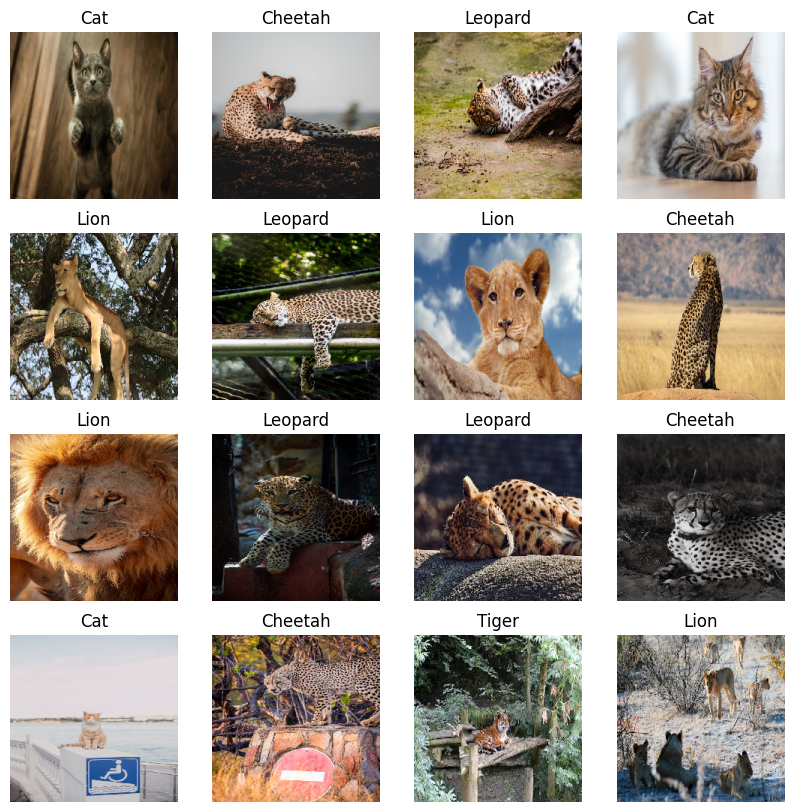

In [3]:
# Display sample images from the training data
sample_images, sample_labels = next(train_generator)
class_labels = list(train_generator.class_indices.keys())  # Convert dict_keys object to list

plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])
    plt.title(class_labels[np.argmax(sample_labels[i])])  # Access elements using indexing
    plt.axis('off')
plt.show()

## Display some images from the test dataset
In this section, we present a selection of images from our test dataset. By visualizing these images, we aim to provide a glimpse into the types of data that our trained model will encounter during the evaluation phase.

Displaying images from the test dataset allows us to assess the diversity and characteristics of the unseen data that our model will be tasked with making predictions on. This visual inspection helps us understand the variability present in the test dataset and ensures that our model is robust and capable of generalizing well to new, unseen images.

By showcasing a subset of test images, we enable stakeholders to gain insights into the nature of the data that our model will be evaluated against. This visual representation serves as a useful tool for understanding the challenges and complexities associated with real-world data and helps in evaluating the performance and reliability of our trained model.

Overall, visualizing images from the test dataset enhances our understanding of the data landscape and aids in ensuring the effectiveness and accuracy of our deep learning model when deployed in real-world scenarios.

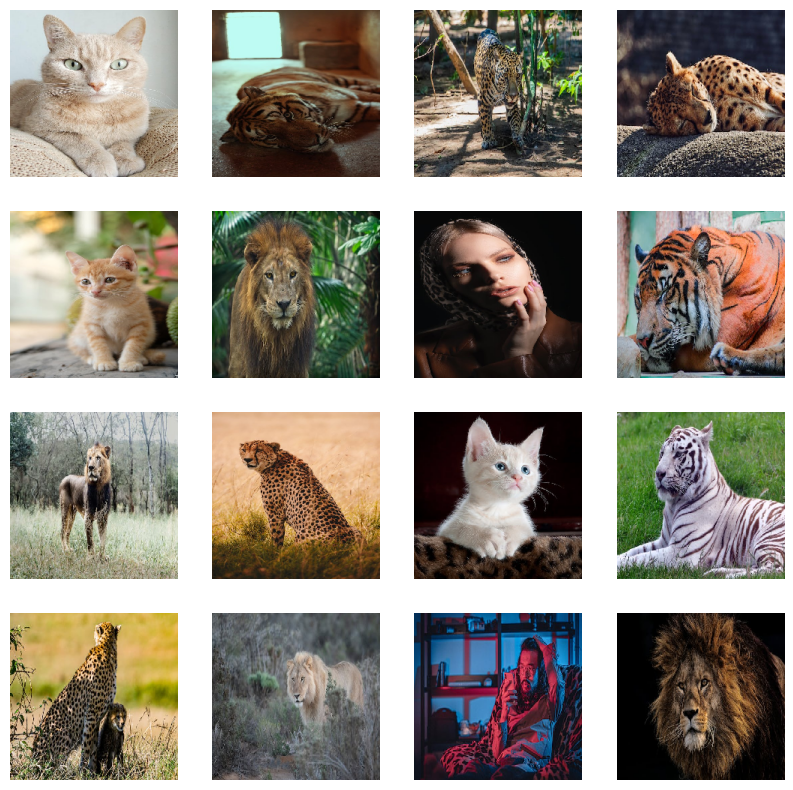

In [4]:
# Display sample images from the test data
sample_images, sample_labels = next(test_generator)

plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])
    
    plt.axis('off')
plt.show()

## Spread of Data

Before diving into model training, it's essential to understand the distribution of our data across different classes. This step helps us identify any class imbalances that may impact the model's performance and guide our decision-making process during training.

To visualize the spread of data, we analyze the number of images per class in the training dataset. We obtain the class labels from the training data generator and calculate the count of images for each class. Using this information, we create a bar chart where each class is represented by a unique color, and the height of the bars indicates the number of images.

This visualization allows us to assess whether our dataset is evenly distributed across all classes or if there are significant variations in sample sizes. Understanding the data distribution helps us design appropriate strategies for handling class imbalances and ensures that our model learns effectively from all classes.

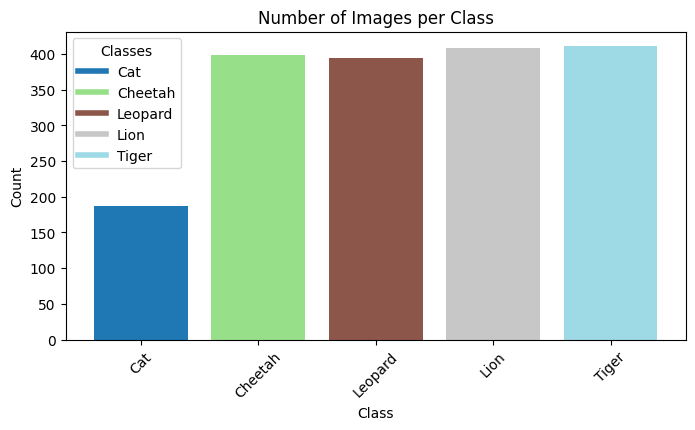

In [5]:
# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Calculate the count of images per class
class_counts = {label: 0 for label in class_labels}

for i in range(len(train_generator)):
    batch_data, batch_labels = train_generator[i]
    for j in range(len(batch_data)):
        class_idx = int(batch_labels[j].argmax())
        class_label = class_labels[class_idx]
        class_counts[class_label] += 1

# Define unique colors for each class
class_colors = plt.cm.tab20(np.linspace(0, 1, len(class_labels)))

# Create a bar chart with different colors for each class
plt.figure(figsize=(8, 4))
bars = plt.bar(class_counts.keys(), class_counts.values(), color=class_colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)

# Add a legend for class colors
legend_labels = [plt.Line2D([0], [0], color=class_colors[i], lw=4, label=class_labels[i]) for i in range(len(class_labels))]
plt.legend(handles=legend_labels, title="Classes")

plt.show()

# Data augmentation
In the data augmentation section, we implement techniques to augment our training dataset, thereby enhancing the robustness and generalization capability of our deep learning model. Data augmentation involves applying a variety of transformations to the existing training images, resulting in an expanded and diversified dataset for model training.

By augmenting the training data, we introduce variability and randomness, simulating real-world scenarios and ensuring that our model becomes invariant to such variations during training. This process helps mitigate overfitting and improves the model's ability to generalize well to unseen data.

Some common data augmentation techniques we employ include:

1. Rotation: Randomly rotating images by a certain degree to simulate different orientations.

2. Width and Height Shifts: Randomly shifting the width and height of images to simulate changes in perspective.

3. Horizontal and Vertical Flipping: Flipping images horizontally or vertically to introduce mirror images.

4. Zooming: Randomly zooming into or out of images to simulate different scales.

5. Brightness and Contrast Adjustment: Altering the brightness and contrast of images to simulate varying lighting conditions.

By applying these augmentation techniques, we effectively increase the diversity of our training dataset, enabling our model to learn more robust and invariant features. This helps improve the model's performance on unseen data and enhances its ability to handle real-world variations and challenges.

Overall, data augmentation plays a crucial role in the training pipeline of our deep learning model, contributing to its overall effectiveness, reliability, and performance in real-world applications.

In [6]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,                # Rescale pixel values to [0, 1]
    rotation_range=20,              # Random rotation within 20 degrees
    width_shift_range=0.2,          # Random horizontal shift by 20% of image width
    height_shift_range=0.2,         # Random vertical shift by 20% of image height
    horizontal_flip=True,           # Random horizontal flipping
    fill_mode='nearest'             # Fill mode for new pixels after shifts/rotations
)

train_generator = train_datagen.flow_from_directory(
    train_path,                     # Path to the training data
    target_size=(images_size, images_size),  # Resize images to this size
    batch_size=batch_size,           # Number of images in each batch
    seed=32,                         # Optional: Set a random seed for shuffling
    shuffle=True,                    # Shuffle the data during training
    class_mode='categorical'        # Mode for class labels (categorical for one-hot encoding)
)

# Create an ImageDataGenerator for test data (without data modification)
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values to [0, 1]

# Use flow_from_dataframe to load the test data
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    test_path,
    x_col='filename',
    y_col='class',
    target_size=(images_size, images_size),
    batch_size=batch_size,
    class_mode='categorical',  # Here we can use 'categorical' because we only have empty labels
    shuffle=False  # Do not shuffle because we want to evaluate the predictions
)

Found 1799 images belonging to 5 classes.
Found 473 validated image filenames belonging to 1 classes.


## Making of validation dataset

To ensure the robustness of our deep learning model and prevent overfitting, we create a validation dataset. This dataset serves as an independent set of images used to evaluate the model's performance during training.

We begin by creating a validation directory if it doesn't already exist. Then, we iterate through each class directory in the training data. For each class, we copy the first 100 images from the training directory to the corresponding class directory within the validation directory. This process ensures that our validation dataset contains a diverse set of images from each class.

By creating a separate validation dataset, we can monitor the model's performance on unseen data during training and adjust hyperparameters accordingly to improve generalization.


In [7]:
# Create validation directory if it doesn't exist
os.makedirs(validation_path, exist_ok=True)

# Get list of directories in the train directory
train_directories = sorted(os.listdir(train_path))

# Copy first 100 images from each directory to the validation directory
for directory in train_directories:
    # Create corresponding directory in validation directory
    os.makedirs(os.path.join(validation_path, directory), exist_ok=True)
    
    # Get list of files in the current directory
    directory_files = sorted(os.listdir(os.path.join(train_path, directory)))
    
    # Select the first 100 files for validation
    files_for_validation = directory_files[:100]
    
    # Copy files to validation directory
    for file_name in files_for_validation:
        source = os.path.join(train_path, directory, file_name)
        destination = os.path.join(validation_path, directory, file_name)
        shutil.copy(source, destination)

print("First 100 images from each class copied to validation directory successfully.")

First 100 images from each class copied to validation directory successfully.


## Save pictures in variable
We save all pictures we put in the validation map, in a seperate variable.

In [8]:
validation_generator = valid_datagen.flow_from_directory(
    validation_path,                     # Path to the training data
    target_size=(images_size, images_size),  # Resize images to this size
    batch_size=batch_size,           # Number of images in each batch
    seed=32,                         # Optional: Set a random seed for shuffling
    shuffle=True,                    # Shuffle the data during training
    class_mode='categorical'        # Mode for class labels (categorical for one-hot encoding)
)

Found 500 images belonging to 5 classes.


In [9]:
def Show_Images(target_gen):
    # Get a batch of images and labels
    batch_images, batch_labels = next(target_gen)

    # Get class labels
    class_labels = list(target_gen.class_indices.keys())

    # Display images with labels
    plt.figure(figsize=(20, 20))
    for n , i in enumerate(list(np.random.randint(0,len(batch_images),36))):
        plt.subplot(6, 6, n + 1)
        plt.imshow(batch_images[i])
        plt.title(class_labels[np.argmax(batch_labels[i])])  # Display the class label
        plt.axis('off')
    plt.show()

## Show Images after Augmentation

After applying data augmentation techniques to our training dataset, it's insightful to visualize how the augmentation has transformed the original images. This step allows us to verify the effectiveness of our augmentation settings and ensures that the augmented images retain the essential features necessary for training.

We display a selection of images from the augmented training dataset, showcasing the variations introduced by augmentation techniques such as rotation, shifting, and flipping. By inspecting these augmented images, we gain a better understanding of how the model will perceive different variations of the same image during training.

Visualizing augmented images also helps us identify any potential issues, such as overly aggressive augmentation leading to distorted or unrealistic images. This feedback loop allows us to fine-tune our augmentation parameters and strike a balance between increasing dataset diversity and preserving image quality.

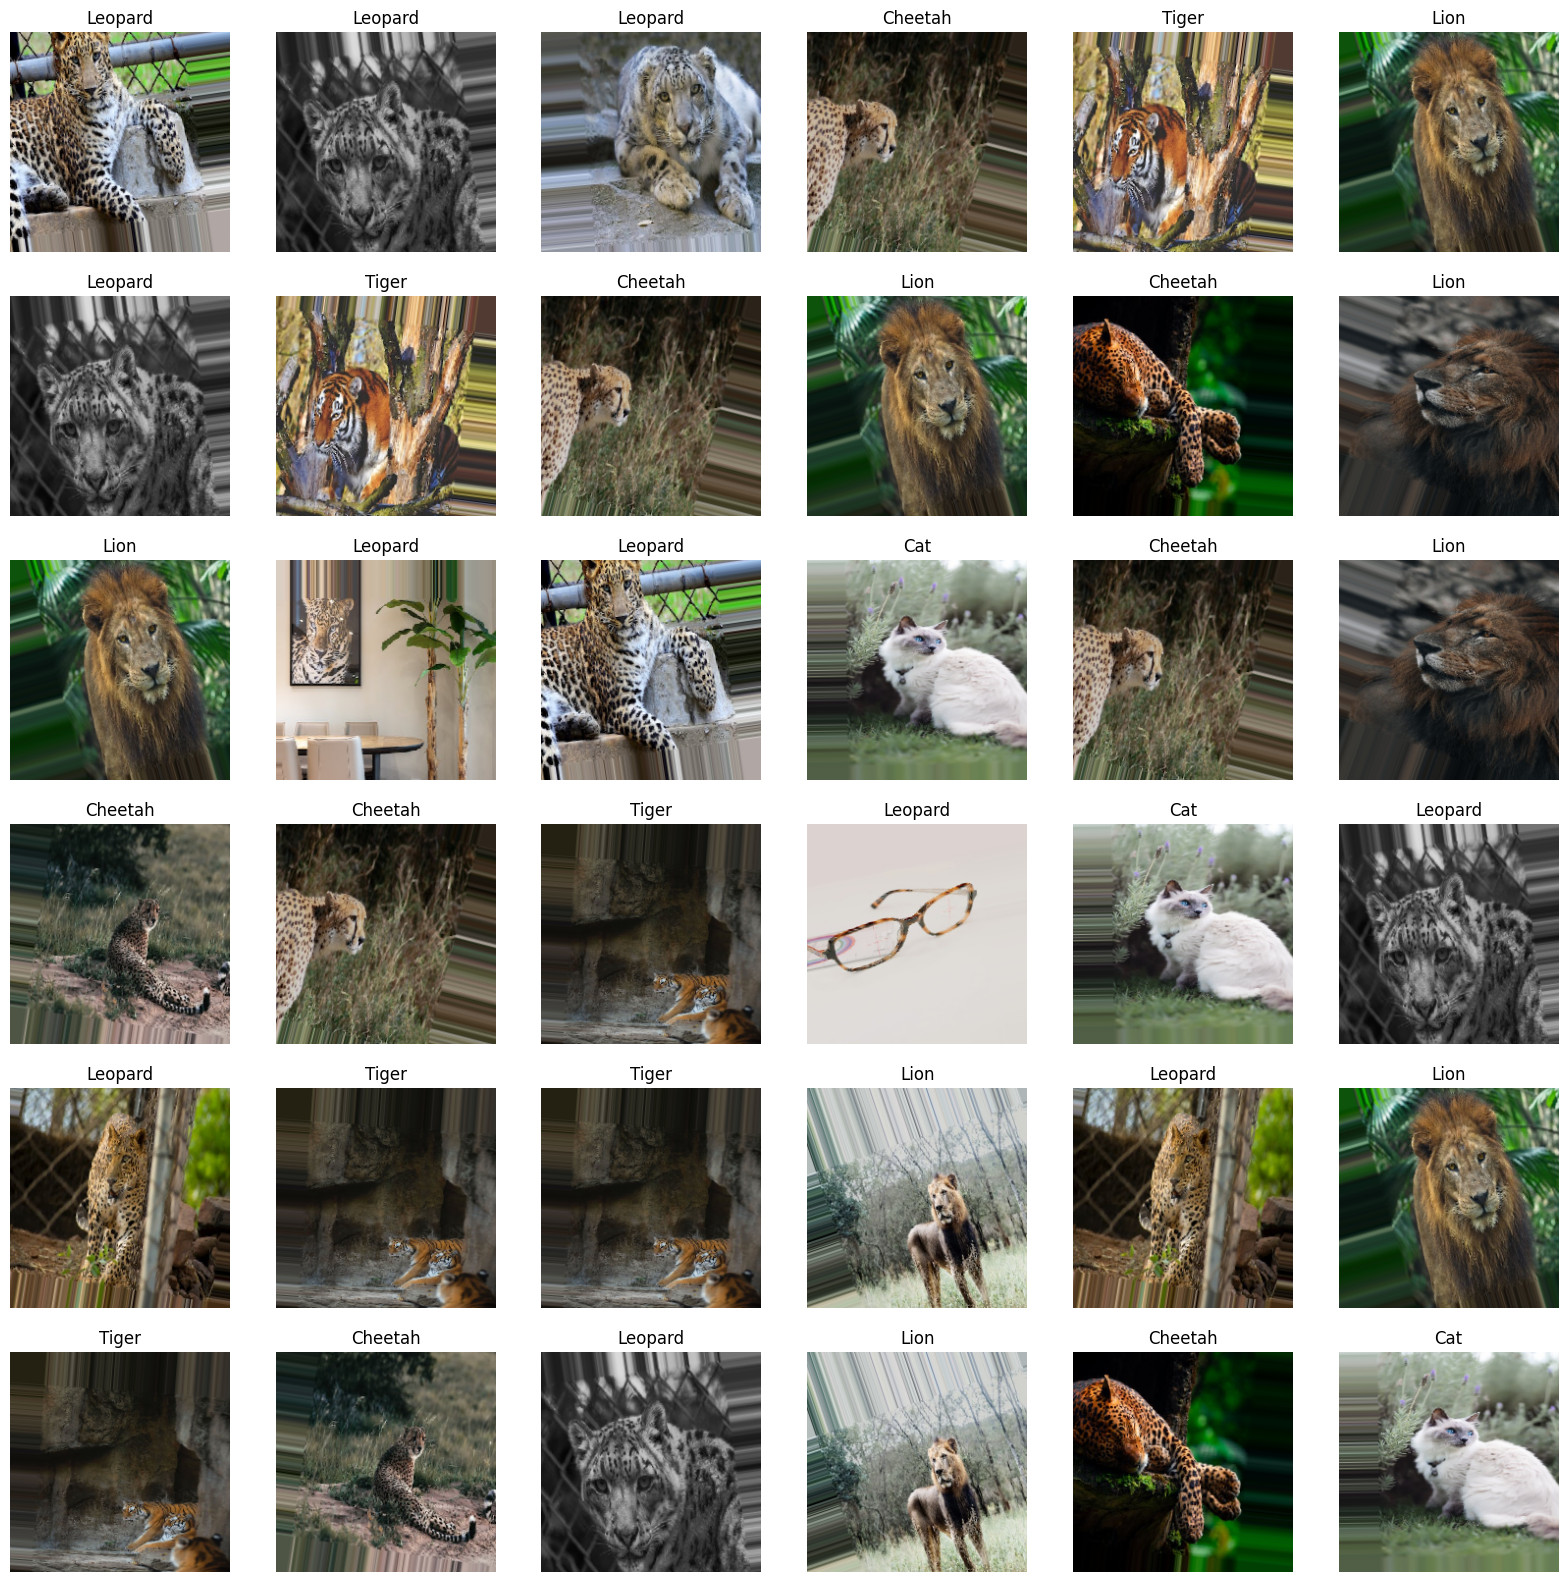

In [10]:
Show_Images(train_generator)

## Training Optimization Callbacks

In this section, we define and configure several callback functions aimed at optimizing the training process and improving model performance. These callbacks are instrumental in dynamically adjusting learning rates, preventing overfitting, and ensuring efficient model convergence.

### Early Stopping

The EarlyStopping callback monitors the validation loss during training and halts the training process if there is no improvement beyond a certain number of epochs (defined by the patience parameter). It helps prevent overfitting by stopping training early when the model's performance on the validation set begins to degrade.

### Reduce Learning Rate on Plateau

The ReduceLROnPlateau callback dynamically adjusts the learning rate during training based on the validation loss. If the validation loss stagnates for a certain number of epochs (determined by the patience parameter), the learning rate is reduced by a specified factor (defined by the factor parameter). This strategy helps the model converge more effectively by fine-tuning the learning rate as needed.

### Learning Rate Schedule using Exponential Decay

Exponential decay is another method for adjusting the learning rate during training. In this schedule, the learning rate exponentially decreases over time, allowing the model to make smaller and more precise adjustments as training progresses. The learning rate is decayed by a factor (decay_rate) every decay_steps epochs.

### Learning Rate Scheduler Callback

The LearningRateScheduler callback applies a pre-defined learning rate schedule during training. It allows for custom learning rate decay functions to be applied based on the current epoch. In our case, we use the ExponentialDecay schedule defined earlier.

### Combining Callbacks

All of these callbacks are combined into a list and passed to the model's fit() function. Together, they optimize the training process by dynamically adjusting learning rates and preventing overfitting, ultimately leading to better model performance.


In [13]:
# Early stopping callback
early_stopping = EarlyStopping(
    min_delta=0.001, # minimum amount of change to count as an improvement
    patience=5,      # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Reduce learning rate on plateau callback
learning_rate_reduce = ReduceLROnPlateau(
    monitor='val_loss', # Metric to monitor for changes (validation loss)
    patience=5,         # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,          # Verbosity mode (0: silent, 1: update messages)
    factor=0.5,         # Factor by which the learning rate will be reduced (e.g., 0.5 means halving)
    min_lr=0.00001      # Lower bound for the learning rate (it won't go below this value)
)

# Learning rate schedule using Exponential Decay
learning_rate_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,  # Initial learning rate for training
    decay_steps=1000,             # Number of steps before decaying the learning rate
    decay_rate=0.5,               # Rate at which the learning rate decreases
)
def lr_schedule(epoch, lr):
 return float(learning_rate_schedule(epoch))

# Learning Rate Scheduler callback using a pre-defined schedule
lr_callback = LearningRateScheduler(lr_schedule)

# Add all callbacks to a list
callback = [early_stopping, learning_rate_reduce, lr_callback]

## Transfer Learning Models comparison
In this section, we collect and configure various pre-trained deep learning models for transfer learning. Transfer learning involves leveraging the knowledge acquired by pre-trained models on large datasets and applying it to new tasks or datasets with limited labeled data.

### Model Selection

We select several popular pre-trained models, namely ResNet50V2, ResNet152V2, InceptionV3, Xception, and MobileNetV2. These models are well-established architectures trained on the ImageNet dataset, which can extract meaningful features from images.

### Model Configuration

Each selected model is configured with specific input shapes and pre-trained weights obtained from ImageNet. The include_top parameter is set to False to exclude the fully connected layers (top layers) of the models, allowing us to add custom classification layers suited to our task.

### Freezing Model Weights

To prevent the pre-trained model weights from being updated during training, we freeze the weights of all the selected transfer learning models. Freezing the weights ensures that only the custom classification layers added on top of the pre-trained models are trained, thereby preserving the learned representations from ImageNet.


In [14]:
# Collect all TL models
TL_Models =[
    ResNet50V2(input_shape=(images_size, images_size, 3), weights='imagenet', include_top=False),
    ResNet152V2(input_shape=(images_size, images_size, 3), weights='imagenet', include_top=False),
    InceptionV3(input_shape=(images_size, images_size, 3), weights='imagenet', include_top=False),
    Xception(input_shape=(images_size, images_size, 3), weights='imagenet', include_top=False),
    MobileNetV2(input_shape=(images_size, images_size, 3), weights='imagenet', include_top=False),
]

# Define all the TL models names. This will be later used during visualization
TL_Models_NAMES = [
    'ResNet50V2',
    'ResNet152V2',
    'InceptionV3',
    'Xception',
    'MobileNetV2',
]

# Freeze the weights of all the TL models
for tl_model in TL_Models:
    tl_model.trainable = False

## Subset Generation from Training Data

In this section, we create a subset of images and their corresponding labels from the training data generator. This subset is useful for various purposes such as quick experimentation, debugging, or reducing computational load during initial model development.

### Subset Collection Process

We initialize empty lists `subset_images` and `subset_labels` to collect images and labels, respectively, for the subset. The desired number of images in the subset is set using the `desired_count` variable.

### Data Collection Loop

We iterate through the training data generator until the desired number of images is collected. During each iteration, batches of images and labels are obtained from the generator and appended to the respective lists. The loop continues until the total number of collected images equals or exceeds the desired count.

### Conversion to Numpy Arrays

Once the desired number of images and labels are collected, we convert the lists into numpy arrays `X_sub` and `y_sub`, respectively. These numpy arrays can then be used for further processing, such as model training or evaluation.


In [15]:
# Create variables to collect images and labels
subset_images = []
subset_labels = []

# Set the desired number of images you want in the subset
desired_count = 1000

# Loop through the generator until you have collected the desired number of images
for images, labels in train_generator:
    subset_images.extend(images)
    subset_labels.extend(labels)

    # Check if you've collected enough images
    if len(subset_images) >= desired_count:
        break

# Convert the collected images and labels to numpy arrays
X_sub = np.array(subset_images)
y_sub = np.array(subset_labels)

## Training Transfer Learning Models

In this section, we train transfer learning models using various pre-trained architectures. Each model is trained on a subset of the training data to expedite experimentation and model evaluation.

### Model Training Loop

We initialize an empty list `HISTORIES` to hold the training histories of each transfer learning model architecture.

For each backbone architecture in the `TL_Models` list, we create a simple model architecture by adding a global average pooling layer, dropout layer, and dense output layer with softmax activation.

### Model Compilation

The model is compiled using categorical cross-entropy as the loss function, Adam optimizer with a specified learning rate schedule, and accuracy as the evaluation metric.

### Model Training

The compiled model is then trained on a subset of the training data (`X_sub` and `y_sub`) for a fixed number of epochs (20 in this case), with a validation split of 20% and a specified batch size.

### Storing Training History

The training history of each model, including training and validation loss and accuracy, is stored in the `HISTORIES` list for further analysis and visualization.


In [ ]:
# Initialize an empty list to hold the histories of each TL_models architecture.
HISTORIES = []

# Loop over every backbone in the BACKBONES list.
for tl_model in tqdm(TL_Models, desc="Training Tl Models"):
    
    # Create the simplest model architecture using the current backbone.
    model = keras.Sequential([
        tl_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(5, activation='softmax')  # Adjust the number of units to match the number of classes
    ])
    
    # Compile the model with the specified loss function, optimizer, and metrics.
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=learning_rate_schedule),
        metrics=['accuracy']  # Specify 'accuracy' as a list
    )
    
    # Train the model on a subset of the training data.
    history = model.fit(
        X_sub, y_sub,
        epochs=20,
        validation_split=0.2,
        batch_size=batch_size
    )
        
    # Store the history of the trained model.
    HISTORIES.append(history.history)

# Building the Chosen Model: Xception

In this section, we construct our chosen model architecture based on Xception. Xception is selected for its impressive performance and suitability for image classification tasks.

## Model Initialization

We initialize the Xception model using pre-trained weights from ImageNet. The `include_top=False` argument ensures that the fully connected layers at the top of the network are not included, allowing us to add custom layers for our specific task.

## Freezing Layers

To leverage the pre-trained features of Xception and prevent them from being updated during training, we freeze all layers of the base model. This ensures that only the additional layers we add will be trained.

## Rationale for Choosing Xception

Xception is chosen based on its exceptional performance in image classification tasks and its ability to capture intricate patterns in images. Its depthwise separable convolutional architecture makes it computationally efficient while maintaining high accuracy, making it a suitable choice for our classification problem.


In [16]:
# Initialize the Xception base model with pre-trained ImageNet weights and exclude the fully connected layers (include_top=False)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(images_size, images_size, 3))

# Freeze the layers of the base model to prevent them from being trained during the fine-tuning process
for layer in base_model.layers:
    layer.trainable = False  # Set trainable attribute to False

## Model Architecture

In this section, we define the architecture of our deep learning model using TensorFlow and Keras. The model is constructed as follows:

1. **Base Model**: We incorporate the Xception base model, which has been pretrained on the ImageNet dataset. This serves as the feature extractor, capturing rich hierarchical representations of the input images.

2. **Global Average Pooling**: The output of the base model is passed through a global average pooling layer, which reduces the spatial dimensions of the feature maps while retaining important information.

3. **Flatten Layer**: Following the global average pooling layer, a flatten layer is added to convert the 3D feature maps into a 1D vector, preparing the data for the fully connected layers.

4. **Dense Layer (256 units)**: This fully connected layer consists of 256 units with a ReLU activation function, allowing the model to learn complex patterns from the extracted features.

5. **Dropout Layer**: To prevent overfitting, a dropout layer with a dropout rate of 0.5 is introduced. This randomly drops 50% of the connections between the previous layer and the current layer during training.

6. **Output Layer**: The final dense layer consists of 5 units, corresponding to the number of classes in our classification task. It utilizes the softmax activation function to output probabilities for each class.

### Model Summary

The summary of the model architecture, including the number of parameters and the output shapes of each layer, is provided below.


In [11]:
# Create a sequential model consisting of the Xception base model followed by additional layers for classification
model = tf.keras.models.Sequential([
    base_model,                            # Add the Xception base model
    layers.GlobalAveragePooling2D(),      # Global average pooling layer to reduce spatial dimensions
    layers.Flatten(),                     # Flatten layer to convert 2D output to 1D tensor
    layers.Dense(256, activation='relu'), # Fully connected layer with 256 units and ReLU activation
    layers.Dropout(0.5),                   # Dropout layer with a dropout rate of 0.5 to prevent overfitting
    layers.Dense(5, activation='softmax')  # Output layer with 5 units (one for each class) and softmax activation
])

# Display the summary of the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

## Model Compilation

In this section, we compile the deep learning model using the Adam optimizer with a learning rate of 0.001. The compilation process involves configuring the model for training by specifying the optimizer, loss function, and evaluation metrics.

### Optimizer

We instantiate the Adam optimizer with a learning rate of 0.001, which controls the step size during the optimization process. The learning rate determines how much the model parameters are updated in each iteration to minimize the loss function.

### Compilation

The model is compiled using the configured optimizer, categorical crossentropy loss function, and accuracy metric for evaluation. Categorical crossentropy is commonly used for multi-class classification tasks, while accuracy measures the model's performance in terms of the proportion of correctly classified samples.

In [12]:
# Instantiate the Adam optimizer with a learning rate of 0.001
optimizer = optimizers.Adam(learning_rate=0.001)

# Compile the model with the Adam optimizer, categorical crossentropy loss function, and accuracy metric
model.compile(optimizer=optimizer,
             loss="categorical_crossentropy",
              metrics=['accuracy']
             )

# Re-instantiate the optimizer with the specified learning rate
optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed

# Compile the model with the optimizer (optional, repeated for clarity)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


## Model Training

In this section, we train the deep learning model using the `fit` method. The training process involves iterating over batches of training data for a specified number of epochs.

### Training Data

We use the `train_generator` to provide batches of training data to the model. The `steps_per_epoch` parameter determines the number of batches to process in each epoch, calculated as the total number of samples divided by the batch size.

### Validation Data

During training, we evaluate the model's performance on a separate validation dataset using the `validation_generator`. The `validation_data` parameter specifies this dataset, and `validation_steps` determines the number of validation batches per epoch.

### Callbacks

We include the `callback` list, which contains callback functions such as early stopping, learning rate reduction, and learning rate scheduling. These callbacks monitor the model's performance during training and adjust training parameters accordingly to improve convergence and prevent overfitting.

### Epochs

The training process is repeated for a total of 20 epochs, with each epoch consisting of iterations over the training data batches and evaluation on the validation dataset.

In [14]:
# Train the model using the fit method
history = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps (batches) per epoch
    epochs=20,  # Number of epochs
    validation_data=validation_generator,  # Validation data generator
    batch_size=batch_size,  # Batch size
    validation_steps=validation_generator.samples // batch_size,  # Number of steps (batches) per validation epoch
    callbacks=[callback]  # List of callbacks for monitoring the training process
)

Epoch 1/20


c:\AI-Oefeningen\DP-ENV\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


112/112 ━━━━━━━━━━━━━━━━━━━━ 66s 552ms/step - accuracy: 0.7220 - loss: 1.9251 - val_accuracy: 0.9032 - val_loss: 0.3375 - learning_rate: 0.0100
Epoch 2/20
  1/112 ━━━━━━━━━━━━━━━━━━━━ 1:07 604ms/step - accuracy: 0.8125 - loss: 0.6204

C:\Program Files\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8125 - loss: 0.6204 - val_accuracy: 1.0000 - val_loss: 0.0046 - learning_rate: 0.0100
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.8388 - loss: 0.4924 - val_accuracy: 0.8952 - val_loss: 0.3195 - learning_rate: 0.0100
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6250 - loss: 0.8242 - val_accuracy: 1.0000 - val_loss: 0.0665 - learning_rate: 0.0100
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.8228 - loss: 0.5739 - val_accuracy: 0.9234 - val_loss: 0.2289 - learning_rate: 0.0100
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.7606 - val_accuracy: 1.0000 - val_loss: 0.0317 - learning_rate: 0.0100
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.8577 - loss: 0.4335
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.004979248624294996.
112/112 ━━━━━━━━━━━━━━━━━━━━ 77s 672ms/step - accuracy: 0.8576 - loss: 0.4334 - val_ac

# Evaluation
## Training and Validation Performance Visualization

After training the model, we visualize the performance metrics over epochs to assess its training progress and generalization capabilities.

### Accuracy Plot

The first plot displays the training and validation accuracy values over the epochs. It provides insights into how well the model learns from the training data and its ability to generalize to unseen validation data. Higher accuracy values indicate better performance.

### Loss Plot

The second plot illustrates the training and validation loss values across epochs. Loss represents the error between the predicted and actual values, with lower values indicating better model performance. Monitoring loss helps in understanding the convergence of the model during training and identifying potential overfitting or underfitting issues.



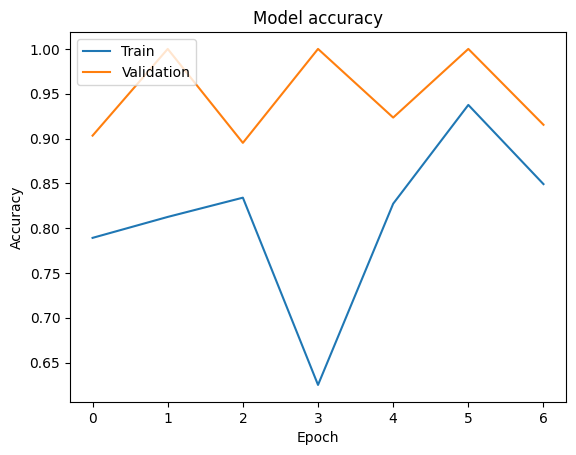

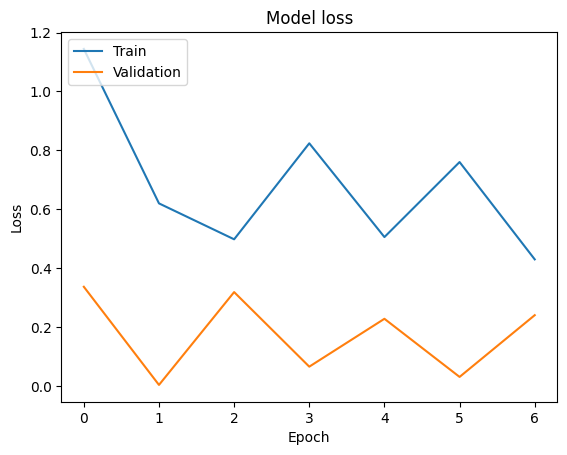

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Model Evaluation

After training and validating the model, we evaluate its performance on the validation dataset to assess its accuracy and loss.

### Evaluation Results

- **Test Loss:** The loss value represents the error between the predicted and actual values on the validation dataset. Lower values indicate better performance.
- **Test Accuracy:** Accuracy measures the proportion of correctly classified samples out of the total validation dataset. Higher values indicate better performance in classifying the images.

In [17]:
# Evaluate the model on the validation data generator
score = model.evaluate(validation_generator, verbose=False)

# Print the test loss and test accuracy
print('Test loss:', score[0])  # Display the test loss
print('Test accuracy:', score[1])  # Display the test accuracy

Test loss: 0.32234251499176025
Test accuracy: 0.9039999842643738


## Confusion Matrix

The confusion matrix provides a visual representation of the model's performance in classifying images across different classes. It compares the true labels (actual classes) with the predicted labels (model's predictions) for the validation dataset.

### Interpretation

- **True Labels (Vertical Axis):** Represents the actual classes of the images.
- **Predicted Labels (Horizontal Axis):** Indicates the classes predicted by the model.
- **Diagonal Elements:** Show the number of correctly classified images for each class.
- **Off-diagonal Elements:** Indicate misclassifications where the true class differs from the predicted class.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

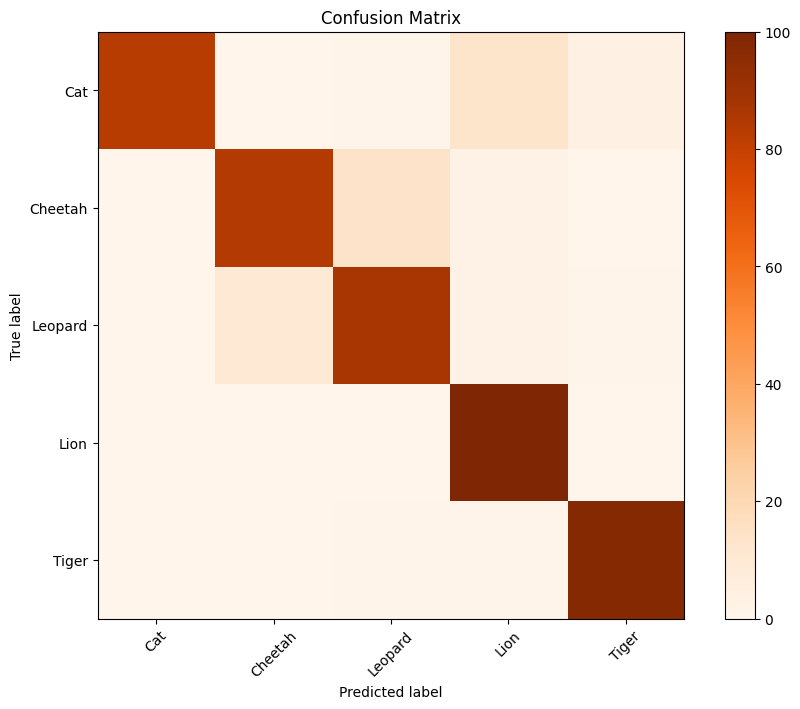

In [18]:
# Initialize empty lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate over each batch in the validation generator
num_batches = len(validation_generator)
for i in range(num_batches):
    x_batch, y_batch = validation_generator[i]  # Get a batch of images and labels
    predictions = model.predict(x_batch)  # Make predictions on the batch
    true_labels.extend(np.argmax(y_batch, axis=1))  # Convert one-hot encoded labels to class indices
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Convert predicted probabilities to class indices

# Get the class names from the validation generator
class_names = validation_generator.class_indices.keys()

# Calculate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(9, 7))
plt.imshow(confusion, interpolation='nearest', cmap=plt.get_cmap('Oranges'))
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## Making Predictions on Test Data

In this step, we use the trained model to make predictions on the test dataset. These predictions are then stored in a DataFrame along with the corresponding filenames. The predicted categories are converted into numerical labels ranging from 0 to 4.

### Process Overview:

1. **Model Prediction:** Utilize the trained model to predict categories for the test images.
2. **Converting Categories:** Convert the predicted categories into numerical labels.
3. **Creating DataFrame:** Build a DataFrame containing filenames and predicted numerical labels.
4. **File Processing:** Remove file extensions (".jpg") from the filenames.
5. **Saving Predictions:** Save the predictions to a CSV file named "predictions.csv".



In [28]:
# Make predictions on the test data
predictions = model.predict(test_generator)

# Convert the predicted probabilities to numerical labels (0 to 4)
predicted_labels = np.argmax(predictions, axis=1)

# Create a DataFrame with file names and corresponding categories
results_df = pd.DataFrame({
    'id': test_df['filename'],  # File names (ids)
    'category': predicted_labels  # Predicted categories (0 to 4)
})

# Remove the file extension (.jpg) from the file names
results_df['id'] = results_df['id'].apply(lambda x: os.path.splitext(x)[0])

# Save the results to a CSV file without file extensions
results_df.to_csv('predictions.csv', index=False)

print("Predictions saved to predictions.csv")


30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step
Predictions saved to predictions.csv
